# Working with online resources

## How to work with this material

* There is always first a text telling you what to do
  * So first try to do it yourself without looking at the code
* Below the text, there is always the code that does the task
  * So look at the code and try to run it and understand it
  * Try to play with it
  * Try to change it and see what happens, this will help you to better
    understand it
* Sometimes, there are also suggestions for additional exercises
  * These are typically not accompanied by solutions
  * Try to solve these yourself if you wish
* As programmers say: Move fast and break things
  * Don't think too long about how to do something
  * Just try to do it somehow, run the code and see what happens
  * Don't be afraid to break stuff; you will probably not break anything
    important :-)
* There are always more ways to do it
  * So you may create a different piece of code than the sample code
    provided here
  * And that's a good thing
  * Any code that does the job is good
  * Additionally, code that does the job and is efficient and elegant is
    great code
    * But in most cases, any code that works is just fine :-)
  * The codes provided here are just some examples of good code, but
    take them just as examples, feel free to diverge from them!

Now, let's get to the actual class on:

# Opening resources from Internet

* Let's "download" the document from http://p.nikde.eu

## Uncool variant: copy-paste

1. Go to http://p.nikde.eu
1. Copy the text
1. Paste it into a variable

In [1]:
copypaste="""Všichni lidé rodí se svobodní a sobě rovní co do důstojnosti a práv.
Všetci ľudia sa rodia slobodní a sebe rovní, čo sa týka ich dostojnosti a práv.
Wszyscy ludzie rodzą się wolni i równi pod względem swej godności i swych praw.
Tutti gli esseri umani nascono liberi ed eguali in dignità e diritti.
Todos los seres humanos nacen libres e iguales en dignidad y derechos.
Alle Menschen sind frei und gleich an Würde und Rechten geboren.
Kaikki ihmiset syntyvät vapaina ja tasavertaisina arvoltaan ja oikeuksiltaan.
Все люди рождаются свободными и равными в своем достоинстве и правах.
Всички хора се раждат свободни и равни по достойнство и права.
All human beings are born free and equal in dignity and rights."""

In [2]:
print(copypaste)

Všichni lidé rodí se svobodní a sobě rovní co do důstojnosti a práv.
Všetci ľudia sa rodia slobodní a sebe rovní, čo sa týka ich dostojnosti a práv.
Wszyscy ludzie rodzą się wolni i równi pod względem swej godności i swych praw.
Tutti gli esseri umani nascono liberi ed eguali in dignità e diritti.
Todos los seres humanos nacen libres e iguales en dignidad y derechos.
Alle Menschen sind frei und gleich an Würde und Rechten geboren.
Kaikki ihmiset syntyvät vapaina ja tasavertaisina arvoltaan ja oikeuksiltaan.
Все люди рождаются свободными и равными в своем достоинстве и правах.
Всички хора се раждат свободни и равни по достойнство и права.
All human beings are born free and equal in dignity and rights.


## Cool variant: get the text from the webpage using Python!

1. `import` the `requests` module
2. use its `get` method to get the contents of the webpage, using the
   webpage's URL as a parameter
   * we will also have to specify the encoding of the response
3. find the text of the webpage inside the `text` field of the response

In [3]:
import requests

In [4]:
my_response = requests.get("http://p.nikde.eu")
my_response.encoding = 'utf8'

In [5]:
print(my_response.text)

Všichni lidé rodí se svobodní a sobě rovní co do důstojnosti a práv.
Všetci ľudia sa rodia slobodní a sebe rovní, čo sa týka ich dostojnosti a práv.
Wszyscy ludzie rodzą się wolni i równi pod względem swej godności i swych praw.
Tutti gli esseri umani nascono liberi ed eguali in dignità e diritti.
Todos los seres humanos nacen libres e iguales en dignidad y derechos.
Alle Menschen sind frei und gleich an Würde und Rechten geboren.
Kaikki ihmiset syntyvät vapaina ja tasavertaisina arvoltaan ja oikeuksiltaan.
Все люди рождаются свободными и равными в своем достоинстве и правах.
Всички хора се раждат свободни и равни по достойнство и права.
All human beings are born free and equal in dignity and rights.


### Additional exercises 1
* count the number of characters in the text, i.e. the `len`gth of the
  text
* split the text into lines (at each newline character `\n`)
* see e.g. the first and the last line

In [6]:
len(my_response.text)

709

In [7]:
lines = my_response.text.split('\n')
lines

['Všichni lidé rodí se svobodní a sobě rovní co do důstojnosti a práv.',
 'Všetci ľudia sa rodia slobodní a sebe rovní, čo sa týka ich dostojnosti a práv.',
 'Wszyscy ludzie rodzą się wolni i równi pod względem swej godności i swych praw.',
 'Tutti gli esseri umani nascono liberi ed eguali in dignità e diritti.',
 'Todos los seres humanos nacen libres e iguales en dignidad y derechos.',
 'Alle Menschen sind frei und gleich an Würde und Rechten geboren.',
 'Kaikki ihmiset syntyvät vapaina ja tasavertaisina arvoltaan ja oikeuksiltaan.',
 'Все люди рождаются свободными и равными в своем достоинстве и правах.',
 'Всички хора се раждат свободни и равни по достойнство и права.',
 'All human beings are born free and equal in dignity and rights.']

In [8]:
print(lines[0])
print(lines[-1])

Všichni lidé rodí se svobodní a sobě rovní co do důstojnosti a práv.
All human beings are born free and equal in dignity and rights.


# REST APIs

* dynamic resources (unlike the static document from previous example,
  which is always the same)
* tools available on the internet for automated use
  * NLP tools (translation, morphological analysis, keyword
    extraction...)
  * jokes, images, weather information...
  * we will look at 5 REST APIs here
* the meaning of the shortcuts is not important
  * REST stands for REpresentational State Transfer
  * API stands for Application Programming Interface
* to use a tool, you need to know:
  * its URL (`http://something.com/some/more/stuff`)
  * its parameters (it may be e.g. `input` for input text)
  * the method to use (`GET` or `POST`)
      * often both are allowed, or just try
  * and sometimes there are some more complications
  * for the static document, there was just the URL (there are no
    parameters)
* ideally, the tool has good documentation explaining how to use it
  * but the world is not ideal
* The requests module makes an educated guess as of the encoding of the
  response. If it guesses wrong, you can set the encoding manually:
  * `response.encoding='utf8'`

## 1st REST API: Machine translation (Transformer)

* Look at [LINDAT
  Translation](https://lindat.mff.cuni.cz/services/translation/)
* Try it out in your browser
* Try to look at the documentation in the Docs tab
  * Try to figure out what URL, parameters and method you need to use

### URL

The URL is composed of:

* the server part: `https://lindat.mff.cuni.cz/`
* the base URL: `/services/translation/api/v2`
* the endpoint: `/models/{model}`
  * this says "Send text to be processed by the selected model"
  * so instead of `{model}` we have to put e.g. `en-cs` for the
    English-Czech model
* the URL parts are to be joined by slashes:
  `SERVER/BASE/ENDPOINT/MODEL`

So the full URL is:

In [9]:
url = "https://lindat.mff.cuni.cz/services/translation/api/v2/models/en-cs"

### Parameters

There are several parameters to set, but we only need one:

* `input_text` text to translate
* we alread specified the `model` in the URL path
* and the model implies the source and target languages (`src`, `tgt`)

We can put the parameters (one parameter in this case) into a dict:

In [10]:
parameters = {"input_text": "All humans are born equal."}

### Method

* The most typical methods are `GET` and `POST`.
* The documentation clearly states that to process text by a translation
  model, we need to use the `POST` method.
* This means that instead of `requests.get()`, which we used in the
  previous example, we will use `requests.post()`

### Try it out!

We now have the URL and parameters, we know which method to use, so shoot!

In [11]:
translation_response = requests.post(url, parameters)
print(translation_response.text)

["V\u0161ichni lid\u00e9 jsou si rovni.\n"]



The response does not look very nice. That's because it is encoded in
JSON. What we see is actually a JSON equivalent of a Python list.

So, what we need to do is to use `translation_response.json()` instead
of `translation_response.text`, so that instead of taking the text
representation of the JSON data, we parse the JSON data and get their
Python representation:

In [12]:
translation_response_parsed = translation_response.json()
print(translation_response_parsed)

['Všichni lidé jsou si rovni.\n']


That's better, right? What we now have is a Python list, which means we
can easily print just its first element:

In [13]:
print(translation_response_parsed[0])

Všichni lidé jsou si rovni.



And that's it, we're done! :-)

### Changing the parameters

REST APIs are dynamic, so we can get translated any text we want,
between any languages supported by the API! So let's change the
parameters, so that we e.g.:

* Translate the text "I like trains very much."
* From English to French

In [14]:
#import requests
url = "https://lindat.mff.cuni.cz/services/translation/api/v2/models/en-fr"
parameters = {"input_text": "I like trains very much."}
translation_response = requests.post(url, parameters)
print(translation_response.json()[0])

J'aime beaucoup les trains.



### Let's put that into a function!

* the first version of the function shall have just one parameter
  * the text to translate
* it needs to set the URL and parameters, do the request, set the
  response encoding, and return the response text

In [15]:
def translate(text):
    url = "https://lindat.mff.cuni.cz/services/translation/api/v2/models/en-cs"
    parameters = {"input_text": text}
    translation_response = requests.post(url, parameters)
    translation_response.encoding = 'utf8'
    translation_response_parsed = translation_response.json()
    return translation_response_parsed[0]

Now let's see how this works:

In [16]:
text = "I had a good breakfast."
output = translate(text)
print(output)

Měl jsem dobrou snídani.



In [17]:
print(translate("I really love trains."))

Opravdu miluju vlaky.



In [18]:
print(translate("My hovercraft is full of eels!"))

Moje vznášedlo je plné úhořů!



### Improving the function

Now let's improve the function by also making the source and target
languages aparmetrizable!

The improved function should have the following three parameters:

* the text to translate
* the source language code (e.g. "en")
* the target language code (e.g. "fr")

There should also be some default values for the parameters, so that the
function can also be called with only the text specified.

In [19]:
def translate(text, target_language="cs", source_language="en"):
    url = f"https://lindat.mff.cuni.cz/services/translation/api/v2/models/{source_language}-{target_language}"
    parameters = {"input_text": text}
    translation_response = requests.post(url, parameters)
    translation_response_parsed = translation_response.json()
    return translation_response_parsed[0]

And now let's see various ways in which this can be used:

In [20]:
print(translate("I had a good breakfast."))

Měl jsem dobrou snídani.



In [21]:
print(translate("I had a good breakfast.", "fr"))

J'ai pris un bon petit déjeuner.



In [22]:
print(translate("Jedu vlakem do Prahy.", "en", "cs"))

I'm taking the train to Prague.



In [23]:
print(translate(source_language="cs", target_language="en", text="Jedu vlakem do Prahy."))

I'm taking the train to Prague.



In [24]:
print(lines[-1])

All human beings are born free and equal in dignity and rights.


In [25]:
print(translate(lines[-1]))

Všichni lidé se rodí svobodní a rovní v důstojnosti a právech.



### Additional exercises 2

* Try to make it work correctly with input text consisting of multiple
  sentences.
* Try to translate the input text into all available target languages at
  once.
* Explore other information that the response object contains.

## 2nd REST API: Jokes

* [The Internet Chuck Norris Database](http://www.icndb.com/) provides a
  REST API
  * This is a database of Chuck Norris jokes
  * The API returns random Chuck Norris jokes
  * See http://www.icndb.com/api/
  * Try to figure out the URL, method, and parameters

### How to use it

* The full URL is `http://api.icndb.com/jokes/random`
* There are some optional parametrs, so let's ignore them now
* The method to use is GET
* So the call will actually be very similar to the first example with
  getting the static webpage from the internet:

In [26]:
url = "http://api.icndb.com/jokes/random"
joke = requests.get(url)
print(joke.text)

{ "type": "success", "value": { "id": 331, "joke": "Chuck Norris once ate four 30lb bowling balls without chewing.", "categories": [] } }


The output is again in JSON, but this time, it is a bit more complex.
The API documentation does explain the format, so try to extract just
the joke text from the response.

In [27]:
joke_parsed = joke.json()
joke_text = joke_parsed['value']['joke']
print(joke_text)

Chuck Norris once ate four 30lb bowling balls without chewing.


### Turning it into a function

* Let's again create a function that calls the REST API.
* It will have no parameters.
* But as the REST API always returns a random joke, repeated calls of
  the function will return different results.
  * So it is even more dynamic than the translation service, which for a
    fixed input always returns the same result.

In [28]:
def joke():
    url = "http://api.icndb.com/jokes/random"
    joke_response = requests.get(url)
    joke_parsed = joke_response.json()
    joke_text = joke_parsed['value']['joke']
    return joke_text

Invoke the function repeatedly and observe how it produces different
outputs.

In [29]:
print(joke())

As a teen, Chuck Norris had sex with every nun in a convent tucked away in the hills of Tuscany. Nine months later the nuns gave birth to the 1972 Miami Dolphins, the only undefeated and untied team in professional football history.


In [30]:
print(joke())

Ninjas want to grow up to be just like Chuck Norris. But usually they grow up just to be killed by Chuck Norris.


In [31]:
print(joke())

Did you know that Chuck Norris was in every Star Wars movie? He was &quot;The Force&quot;.


### Adding parameters

* So far, we have ignored the option to specify some parameters for the
  REST API call.
* Actually, the only thing you can do is change the name of the main
  character in the jokes.
* So let's do it!

In [32]:
params = {"firstName": "David", "lastName": "Lukes"}
joke_response = requests.get(url, params)
print(joke_response.json()['value']['joke'])

If you try to kill -9 David Lukes's programs, it backfires.


Now, let's update our function to also allow specifying these
parameters.

In [33]:
def joke(firstName = 'Chuck', lastName = 'Norris'):
    url = "http://api.icndb.com/jokes/random"
    params = {"firstName": firstName, "lastName": lastName}
    joke_response = requests.get(url, params)
    joke_parsed = joke_response.json()
    joke_text = joke_parsed['value']['joke']
    return joke_text

And let's run it with various parameters.

In [34]:
print(joke())

Chuck Norris can lock a safe and keep the key inside it.


In [35]:
print(joke('Rudolf', 'Rosa'))

How much wood would a woodchuck chuck if a woodchuck could Rudolf Rosa? All of it.


In [36]:
print(joke('yo', 'mama'))

yo mama originally wrote the first dictionary. The definition for each word is as follows - A swift roundhouse kick to the face.


### Additional exercises 3

* Try to connect the joke API with the translation API
  * Get a random joke
  * Translate it to another language
  * Print the translated joke

## 3rd REST API: Cat images

* Let's see some cats!
* Try to search in Google for a cat image REST API
* You may find one e.g. at https://cataas.com/
* The simplest way to use it is to just ask it for a random cat by
  getting `https://cataas.com/cat`

In [37]:
url = "https://cataas.com/cat"
r = requests.get(url)
print(r.text[:300])

�PNG

IHDR  X  �   Q�>�   bKGD � � �����  � IDATxڜ�۶$I�$����=�ά>�C`�\| �����_�Aw���;��.�UQ���XL�����n�QQ�����zrΘs��UE)PE�w�Z��_�������� �_��'tN���'�}��z"�������\�z���8�?����8���"��3 ��	I	g� �w�9Qk�y�x�������b�	���9gԣB�c@� T'�  ��߫��|�8���_�#�UE� p�r.


The output is not very nice. Well, it is an image, so that's binary
data, not a text which can be meaningfully printed.

In Python, we can disply the data using the `Image()` function from the
`IPython.core.display` package.  And as the response is not textual, we
again need to use a different view on it, this time taking its content
directly from `response.content`.

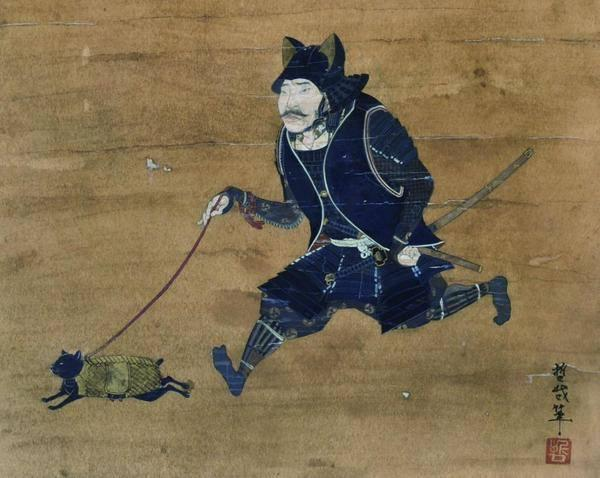

In [38]:
from IPython.core.display import Image
url = "https://cataas.com/cat"
r = requests.get(url)
Image(r.content)

### Additional exercises 4

* Try to run the code above repeatedly to get a different cat each time.
* Try to put it into a function.
* Check out the options and parameters in the documentation to try
  getting more specific cats than just plain random.

## 4th REST API: Named entities (NameTag)

* Look at the [LINDAT
  NameTag](http://lindat.mff.cuni.cz/services/nametag/) tool for named
  entity detection and recognition
* Try out the tool using the web interface
  * Select the English model
  * Put in e.g. some newspaper text
  * Explore the results
* Look at the REST API Documentation of the tool
  * Try to find out how to use it (URL, method, parameters)
  * Try to call the tool on a sample sentence, e.g.:

In [39]:
sentence = "David Lukes teaches Python in Prague."

* This time, we can use either GET or POST as we wish. In such cases,
  using POST is usually better, since GET is more limited (especially in
  the maximum input size).
* There is some clever model selection and guessing, which seems to be
  broken, so you need to use the full model name.
* The default output is XML, which is fine if you know how to work with
  XML. As we do not cover that in our course, we will use the vertical
  output instead.

In [40]:
url = "http://lindat.mff.cuni.cz/services/nametag/api/recognize"

parameters = {
    "data": sentence,
    "model": "english-conll-140408",
    "output": "vertical"
}

res = requests.get(url, parameters)

print(res.text)

{
 "model": "english-conll-140408"
,"acknowledgements": [
  "http://ufal.mff.cuni.cz/nametag#nametag_acknowledgements"
 ,"http://ufal.mff.cuni.cz/morphodita#morphodita_acknowledgements"
 ]
,"result": "1,2\tPER\tDavid Lukes\n4\tPER\tPython\n6\tLOC\tPrague\n"
}



We can see that the output is again JSON, with the `result` field
containing the result, so let's print only that one.

In [41]:
result = res.json()['result']
print(result)

1,2	PER	David Lukes
4	PER	Python
6	LOC	Prague



The result lists the named entities found in the text, together with
their start and end positions and their types.  We can see that the
result actually uses another format, tab-spearated values. This is fine
for printing, but for further processing, we would need to split it.
So, let's split the result into individual lines, split these lines into
the fields, and let's print only the entity types.

In [42]:
for line in result.split('\n'):
    fields = line.rstrip().split('\t')
    if len(fields) == 3:
        print(fields[1])

PER
PER
LOC


### Additional exercises 5

* Try to wrap it into a function
* Try to parametrize it for the language (but only English and Czech are
  supported)
* Try to visualize the outputs somehow, e.g. by prefixing each named
  entity with its type:
  * `PER David Lukes teaches PER Python in LOC Prague.`

## 5th REST API: Morphological analysis (UDPipe)

* The last tool we will look at is
  [UDPipe](https://lindat.mff.cuni.cz/services/udpipe/)
* It performs tokenization, lemmatization, morphological tagging, and
  syntactic dependency parsing.
* It follows the Universal Dependencies standards
* It supports something like 50 languages!
* As usual:
  * Check out the tool online
  * Try playing with it using the web-based demo, probably copy-pasting
    some texts from news websites
  * Try to figure out how to use its REST API and then try to use it
  * The syntactic parsing output is hard to use, so let's just stick to
    tokenization and tagging

In [43]:
url = "http://lindat.mff.cuni.cz/services/udpipe/api/process"

parameters = {
    "data": "All human beings are born free and equal in dignity and rights. I like trains.",
    "model": "english",
    "tokenizer": 1,
    "tagger": 1,
}

response = requests.post(url, parameters)
print(response.text)

{
 "model": "english-ewt-ud-2.5-191206",
 "acknowledgements": [
  "http://ufal.mff.cuni.cz/udpipe#udpipe_acknowledgements",
  "http://ufal.mff.cuni.cz/udpipe/models#universal_dependencies_25_models_acknowledgements"
 ],
 "result": "# newdoc\n# newpar\n# sent_id = 1\n# text = All human beings are born free and equal in dignity and rights.\n1\tAll\tall\tDET\tDT\t_\t_\t_\t_\t_\n2\thuman\thuman\tADJ\tJJ\tDegree=Pos\t_\t_\t_\t_\n3\tbeings\tbeing\tNOUN\tNNS\tNumber=Plur\t_\t_\t_\t_\n4\tare\tbe\tAUX\tVBP\tMood=Ind|Tense=Pres|VerbForm=Fin\t_\t_\t_\t_\n5\tborn\tbear\tVERB\tVBN\tTense=Past|VerbForm=Part|Voice=Pass\t_\t_\t_\t_\n6\tfree\tfree\tADJ\tJJ\tDegree=Pos\t_\t_\t_\t_\n7\tand\tand\tCCONJ\tCC\t_\t_\t_\t_\t_\n8\tequal\tequal\tADJ\tJJ\tDegree=Pos\t_\t_\t_\t_\n9\tin\tin\tADP\tIN\t_\t_\t_\t_\t_\n10\tdignity\tdignity\tNOUN\tNN\tNumber=Sing\t_\t_\t_\t_\n11\tand\tand\tCCONJ\tCC\t_\t_\t_\t_\t_\n12\trights\trights\tNOUN\tNNS\tNumber=Plur\t_\t_\t_\tSpaceAfter=No\n13\t.\t.\tPUNCT\t.\t_\t_\t_\t_\t_\n\n#

### CoNLL-U

Similarly to NameTag, we can see that the result is in the `result`
field of the returned JSON, again using a tab-separated text format; in
this case, this is actually the standard [CoNLL-U
format](http://universaldependencies.org/docs/format.html), which is
defined and used with Universal Dependencies.

Let's parse the JSON and print the result first.

In [44]:
print(response.json()['result'])

# newdoc
# newpar
# sent_id = 1
# text = All human beings are born free and equal in dignity and rights.
1	All	all	DET	DT	_	_	_	_	_
2	human	human	ADJ	JJ	Degree=Pos	_	_	_	_
3	beings	being	NOUN	NNS	Number=Plur	_	_	_	_
4	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	_	_	_	_
5	born	bear	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	_	_	_	_
6	free	free	ADJ	JJ	Degree=Pos	_	_	_	_
7	and	and	CCONJ	CC	_	_	_	_	_
8	equal	equal	ADJ	JJ	Degree=Pos	_	_	_	_
9	in	in	ADP	IN	_	_	_	_	_
10	dignity	dignity	NOUN	NN	Number=Sing	_	_	_	_
11	and	and	CCONJ	CC	_	_	_	_	_
12	rights	rights	NOUN	NNS	Number=Plur	_	_	_	SpaceAfter=No
13	.	.	PUNCT	.	_	_	_	_	_

# sent_id = 2
# text = I like trains.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	_	_	_	_
2	like	like	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	_	_	_	_
3	trains	train	NOUN	NNS	Number=Plur	_	_	_	SpaceAfter=No
4	.	.	PUNCT	.	_	_	_	_	SpaceAfter=No




This is good for viewing the result, but it needs some further
processing to be usable in Python.  We could parse the result manually
using some splitting and such, as we did with NameTag, but now the
format is more complex and has some special properties and special
rules, so it is not as trivial to process as the NameTag output format
(but it is still simple enough for reasonably easy processing).

### conllu module

Since we are now dealing with a standard format, we can also simply use
an existing Python package designed for working with CoNLL-U files,
which is called `conllu`.

In [45]:
import conllu

In [46]:
the_output = response.json()['result']
sentences = conllu.parse(the_output)
sentences

[TokenList<All, human, beings, are, born, free, and, equal, in, dignity, and, rights, .>,
 TokenList<I, like, trains, .>]

This way, we get the CoNLL-U data represented as Python objects, which
is much easier to work with than the original format.  We can see that
the data are represented as a list of sentences, where each sentence is
a `TokenList`.  Let's see just the first sentence.

In [47]:
sentences[0]

TokenList<All, human, beings, are, born, free, and, equal, in, dignity, and, rights, .>

And let's see just the fifth word from the first sentence.

In [48]:
sentences[0][5]

OrderedDict([('id', 6),
             ('form', 'free'),
             ('lemma', 'free'),
             ('upostag', 'ADJ'),
             ('xpostag', 'JJ'),
             ('feats', OrderedDict([('Degree', 'Pos')])),
             ('head', None),
             ('deprel', '_'),
             ('deps', None),
             ('misc', None)])

This shows us that the tokens themselves are represented as an
`OrderedDict`; which is just like a regular `dict` with a guaranteed
order of its elements. Therefore, it is simple to only get e.g. the
word form and the Universal Part-of-speech tag for the word.

In [49]:
print(sentences[0][5]['form'])
print(sentences[0][5]['upostag'])

free
ADJ


In [50]:
url = "http://lindat.mff.cuni.cz/services/udpipe/api/process"
parameters = {
    "data": "All human beings are born free and equal in dignity and rights.",
    "model": "english",
    "tokenizer": 1,
    "tagger": 1,
}
response = requests.post(url, parameters)
the_output = conllu.parse(response.json()['result'])

### Playing with the output

What we now have is a fine and linguistically richly annotated output,
so there is a lot of things we can do with it. Let's try a few!

Let's e.g. try, for each token, to print its word form and its POS tag.

In [51]:
for sentence in sentences:
    print('Writing out a sentence', sentence)
    for token in sentence:
        print("The UPOStag for", token['form'], "is", token['upostag'])

Writing out a sentence TokenList<All, human, beings, are, born, free, and, equal, in, dignity, and, rights, .>
The UPOStag for All is DET
The UPOStag for human is ADJ
The UPOStag for beings is NOUN
The UPOStag for are is AUX
The UPOStag for born is VERB
The UPOStag for free is ADJ
The UPOStag for and is CCONJ
The UPOStag for equal is ADJ
The UPOStag for in is ADP
The UPOStag for dignity is NOUN
The UPOStag for and is CCONJ
The UPOStag for rights is NOUN
The UPOStag for . is PUNCT
Writing out a sentence TokenList<I, like, trains, .>
The UPOStag for I is PRON
The UPOStag for like is VERB
The UPOStag for trains is NOUN
The UPOStag for . is PUNCT


Or, let's only print the nouns.

In [52]:
for sentence in sentences:
    for token in sentence:
        if token['upostag'] == 'NOUN':
            print(token['form'])

beings
dignity
rights
trains


### A function

Let's wrap the whole thing, including printing the nouns, into one
function.

In [53]:
def nouns(text, language='english'):
    url = 'http://lindat.mff.cuni.cz/services/udpipe/api/process'
    parameters = {
        "data": text,
        "model": language,
        "tokenizer": 1,
        "tagger": 1,
    }
    response = requests.get(url, parameters)
    json_dict = response.json()
    text_result = json_dict['result']
    conllu_result = conllu.parse(text_result)

    for sentence in conllu_result:
        for token in sentence:
            if token['upostag'] == 'NOUN':
                print(token['form'])

And let's invoke the function.

In [54]:
nouns("My hovercraft is full of eels.")

hovercraft
eels


In [55]:
nouns("Moje vznášedlo je plné úhořů.", 'czech')

vznášedlo
úhořů


### Additional exercises 6

* Try to join multiple REST APIs together, e.g.
  * Get a joke in English
  * Translate it to French
  * Print out the morphological analysis of the joke in French; or e.g.
    only print the French nouns from the joke
  * Ideally, these should be three separate functions for each of the
    REST APIs, plus one wrapper function that calls the other functions
    and passes the results from one as the input to the other.
  * Observe how you have just managed to do three non-trivial tasks with
    just a few lines of code, thanks to the fact that the authors of the
    tools made them available through a REST API, and thanks to the fact
    that working with REST APIs is quite simple in Python.
* Look for other REST APIs and try to use some of them
  * [A list of free REST
    APIs](https://github.com/toddmotto/public-apis/blob/master/README.md),
    such as [Cat facts](https://alexwohlbruck.github.io/cat-facts/docs/)
  * Many NLP tools and services are also available through REST APIs
  * Sometimes you have to register, sometimes you have to pay...
  * Often the documentation is scarce, confusing or non-existent, so you
    simply have to try out things and see what results you are getting.